## How to capture images?
+ Use background that are of different color than that of your palm/hand. 
+ You can try using backgr|ounds that aren't plain as well. Just make sure to check the image given after removing the background. This requires an account of removebg application.
+ Make sure the image isn't too bright or too dark, just make sure to have focus(in terms of light) to your hand.


## Download the saved model 
https://drive.google.com/file/d/1NYKDokzYNfMOYnFxRhzWJvm-gJCOcEm2/view?usp=sharing

## Import Libraries


In [9]:
import os
import cv2
import numpy as np
import time
from keras.layers import Dense, Flatten
from removebg import RemoveBg
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.models import Model
import matplotlib.pyplot as plt


## Image capture and save

In [10]:
def capture_and_save():
    cap = cv2.VideoCapture(0)

    if cap.isOpened(): # try to get the first frame
        ret, PersonView = cap.read()
    else:
        ret = False

    while ret:   

        ret, PersonView = cap.read()
        PersonView = cv2.flip(PersonView,1)

        #start_point (x1,y1) and end_point (x2,y2)
        y1 = 78
        y2 = 300
        x1 = 378
        x2 = 600
        
  
        HandView = PersonView[y1-1:y2+1, x1-1:x2+1] 
        cv2.rectangle(PersonView,(x1,y1),(x2,y2),(255,0,0),1) 
        cv2.imshow("Sign Window", HandView)


        k = cv2.waitKey(5) & 0xFF
        if k == 32: #press space to capture photo
            cv2.imwrite("Signs/sign.jpg" ,HandView) 
            print("Image saved")

        if k ==  27:
                break

    cv2.destroyAllWindows()
    cap.release()




## Download VGG16 model and load the saved weights

In [11]:
map_characters= {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z',26:'space'}
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
num_labels = len(map_characters)
predictions = Dense(units=num_labels,activation ="softmax")(x)
model = Model(inputs=vgg.input,outputs=predictions)
model.compile(loss='categorical_crossentropy', 
              optimizer= "adam", 
              metrics=['accuracy'])
model.summary()
# load weights into new model
weight_path = 'model-bestWeights_vacc.h5'
model.load_weights(weight_path)
print("Loaded model from disk")

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

## Test the model with real time image data
+ Place your hand with in the frames of the sign window. Make your hand sign take the most area in the frame.
+ Press "space" bar to capture the image after placing your hand.
+ Press "escape" to leave the OpenCV sign window.

Image saved
14
The predicted output is : O


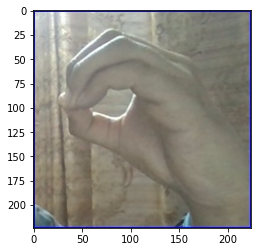

In [13]:
try:
    capture_and_save()
except:
    print("Run This Again!!")
#rmbg = RemoveBg("AJ4TxvTPY3rpu3fTaBVLpfEp", "error.log")
#rmbg.remove_background_from_img_file("Signs/sign.jpg",bg_color="black")   
test_image = image.load_img("Signs/sign.jpg", 
                            color_mode ='rgb',
                            target_size = (224, 224))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = model.predict(test_image)


res = np.argmax(result)
img = cv2.imread("Signs/sign.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(res)
print("The predicted output is :",map_characters[res])
 